#THE MADNESS IS HERE

In [18]:
import os
import numpy as np
import pandas as pd
os.chdir('C:\Users\Rich\OneDrive\Documents\Independent Projects\Kaggle Data and Submissions\MarchMadness2016')

## FIRST GET THE DATAS

**Teams** - This file identifies the different college teams present in the dataset. Each team has a 4 digit id number.

In [2]:
teams = pd.read_csv('teams.csv', index_col='Team_Id')
teams.head()

,Team_Name
Team_Id,
1101,Abilene Chr
1102,Air Force
1103,Akron
1104,Alabama
1105,Alabama A&M


**Seasons** - This file identifies the different seasons included in the historical data, along with certain season-level properties. We have 32 years of data.  

*Note: Dayzero is the season start date*.

In [3]:
seasons = pd.read_csv('seasons.csv', index_col='Season')
seasons.head()

,Dayzero,Regionw,Regionx,Regiony,Regionz
Season,,,,,
1985,10/29/1984,East,West,Midwest,Southeast
1986,10/28/1985,East,Midwest,Southeast,West
1987,10/27/1986,East,Southeast,Midwest,West
1988,11/02/1987,East,Midwest,Southeast,West
1989,10/31/1988,East,West,Midwest,Southeast


**RegularSeasonCompactResults** - This file identifies the game-by-game results for 31 seasons of historical data, from 1985 to 2015. Each year, it includes all games played from daynum 0 through 132 (which by definition is "Selection Sunday," the day that tournament pairings are announced). Each row in the file represents a single game played.  

*Note: "wloc" - Identifies the "location" of the winning team. If the winning team was the home team, this value will be "H". If the winning team was the visiting team, this value will be "A". If it was played on a neutral court, then this value will be "N"*.

In [4]:
regularSeasonCompactResults = pd.read_csv('RegularSeasonCompactResults.csv')
regularSeasonCompactResults.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


**RegularSeasonDetailedResults** - This file is a more detailed set of game results, covering seasons 2003-2015. This includes team-level total statistics for each game (total field goals attempted, offensive rebounds, etc.).

In [5]:
regularSeasonDetailedResults = pd.read_csv('RegularSeasonDetailedResults.csv')
regularSeasonDetailedResults.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


**TourneyCompactResults** - This file identifies the game-by-game NCAA tournament results for all seasons of historical data. The data is formatted exactly like the regular season data. Note that these games also include the play-in games (which always occurred on day 134/135) for those years that had play-in games.

In [6]:
tourneyCompactResults = pd.read_csv('TourneyCompactResults.csv')
tourneyCompactResults.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


**TourneyDetailedResults** - This file contains the more detailed results for tournament games from 2003 onward.

In [7]:
tourneyDetailedResults = pd.read_csv('TourneyDetailedResults.csv')
tourneyDetailedResults.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


**TourneySeeds** - This file identifies the seeds for all teams in each NCAA tournament, for all seasons of historical data. Thus, there are between 64-68 rows for each year, depending on the bracket structure.

In [8]:
tourneySeeds = pd.read_csv('tourneySeeds.csv')
tourneySeeds.head()

,Season,Seed,Team
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


**TourneySlots** - This file identifies the mechanism by which teams are paired against each other, depending upon their seeds. Because of the existence of play-in games for particular seed numbers, the pairings have small differences from year to year. If there were N teams in the tournament during a particular year, there were N-1 teams eliminated (leaving one champion) and therefore N-1 games played, as well as N-1 slots in the tournament bracket, and thus there will be N-1 records in this file for that season.

In [9]:
tourneySlots = pd.read_csv('tourneySlots.csv')
tourneySlots.head()

,Season,Slot,Strongseed,Weakseed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12


##NEXT PICTURES AND STUFF
LETS QUANTIFY MY MISERY!  Thanks Boston College!

In [10]:
teams['Team_Name'][teams['Team_Name']=='Boston College']

Team_Id
1130    Boston College
Name: Team_Name, dtype: object

In [11]:
#Number of BC Wins - All Time
bc_wins = regularSeasonCompactResults[regularSeasonCompactResults['Wteam']==1130]
print bc_wins.shape[0]

485


In [12]:
#Number of BC Losses - All Time
bc_losses = regularSeasonCompactResults[regularSeasonCompactResults['Lteam']==1130]
print bc_losses.shape[0]

434


In [13]:
#All BC Games
bc_games = pd.concat([bc_wins, bc_losses])
bc_games.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
85,1985,29,1130,86,1306,63,A,0
260,1985,34,1130,82,1448,76,N,0
325,1985,37,1130,90,1135,70,A,0
536,1985,43,1130,70,1348,50,H,0
611,1985,47,1130,85,1221,63,A,0


In [14]:
#Sort Games by Date
bc_games.sort(ascending=['Season', 'Daynum'], inplace=True)

#Calculate BC Record by Season
bc_games['BC_Win'] = bc_games['Wteam']==1130
bc_games['BC_Loss'] = bc_games['Lteam'] == 1130
bc_games['Cum_Wins'] = bc_games.groupby(['Season'])['BC_Win'].cumsum()
bc_games['Cum_Losses'] = bc_games.groupby(['Season'])['BC_Loss'].cumsum()
bc_games['Games_Over_500'] = bc_games['Cum_Wins'] - bc_games['Cum_Losses']

#Show 2015
bc_games[bc_games['Season']==2015]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,BC_Win,BC_Loss,Cum_Wins,Cum_Losses,Games_Over_500
134574,2015,11,1130,58,1306,50,H,0,True,False,1,0,1
134721,2015,13,1269,71,1130,62,N,0,False,True,1,1,0
134888,2015,17,1130,69,1307,65,N,0,True,False,2,1,1
134979,2015,18,1452,70,1130,66,N,0,False,True,2,2,0
135070,2015,20,1173,65,1130,53,N,0,False,True,2,3,-1
135491,2015,28,1130,79,1265,61,H,0,True,False,3,3,0
135638,2015,32,1130,69,1344,60,H,0,True,False,4,3,1
135860,2015,38,1130,85,1263,74,H,0,True,False,5,3,2
135959,2015,41,1130,63,1127,49,H,0,True,False,6,3,3
136257,2015,48,1425,75,1130,71,A,0,False,True,6,4,2


In [19]:
#Join Coaches to BC Data
bc_coaches = pd.DataFrame({
        'Season': np.arange(1985, 2016),
        'Coach': ["Gary Williams", "Gary Williams", "Jim O'Brien", "Jim O'Brien", "Jim O'Brien", "Jim O'Brien", "Jim O'Brien", 
                  "Jim O'Brien", "Jim O'Brien", "Jim O'Brien", "Jim O'Brien", "Jim O'Brien", "Al Skinner", "Al Skinner", 
                  "Al Skinner", "Al Skinner", "Al Skinner", "Al Skinner", "Al Skinner", "Al Skinner", "Al Skinner", 
                  "Al Skinner", "Al Skinner", "Al Skinner", "Al Skinner", "Al Skinner", "Steve Donahue", "Steve Donahue", 
                  "Steve Donahue", "Steve Donahue", "Jim Christian"]
    })

bc_coaches

,Coach,Season
0,Gary Williams,1985
1,Gary Williams,1986
2,Jim O'Brien,1987
3,Jim O'Brien,1988
4,Jim O'Brien,1989
5,Jim O'Brien,1990
6,Jim O'Brien,1991
7,Jim O'Brien,1992
8,Jim O'Brien,1993
9,Jim O'Brien,1994


In [20]:
#Merge Coaches into BC Games Dataset
bc_games = pd.merge(bc_games, bc_coaches, on='Season')
bc_games.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,BC_Win,BC_Loss,Cum_Wins,Cum_Losses,Games_Over_500,Coach
0,1985,29,1130,86,1306,63,A,0,True,False,1,0,1,Gary Williams
1,1985,34,1130,82,1448,76,N,0,True,False,2,0,2,Gary Williams
2,1985,37,1130,90,1135,70,A,0,True,False,3,0,3,Gary Williams
3,1985,43,1130,70,1348,50,H,0,True,False,4,0,4,Gary Williams
4,1985,47,1130,85,1221,63,A,0,True,False,5,0,5,Gary Williams


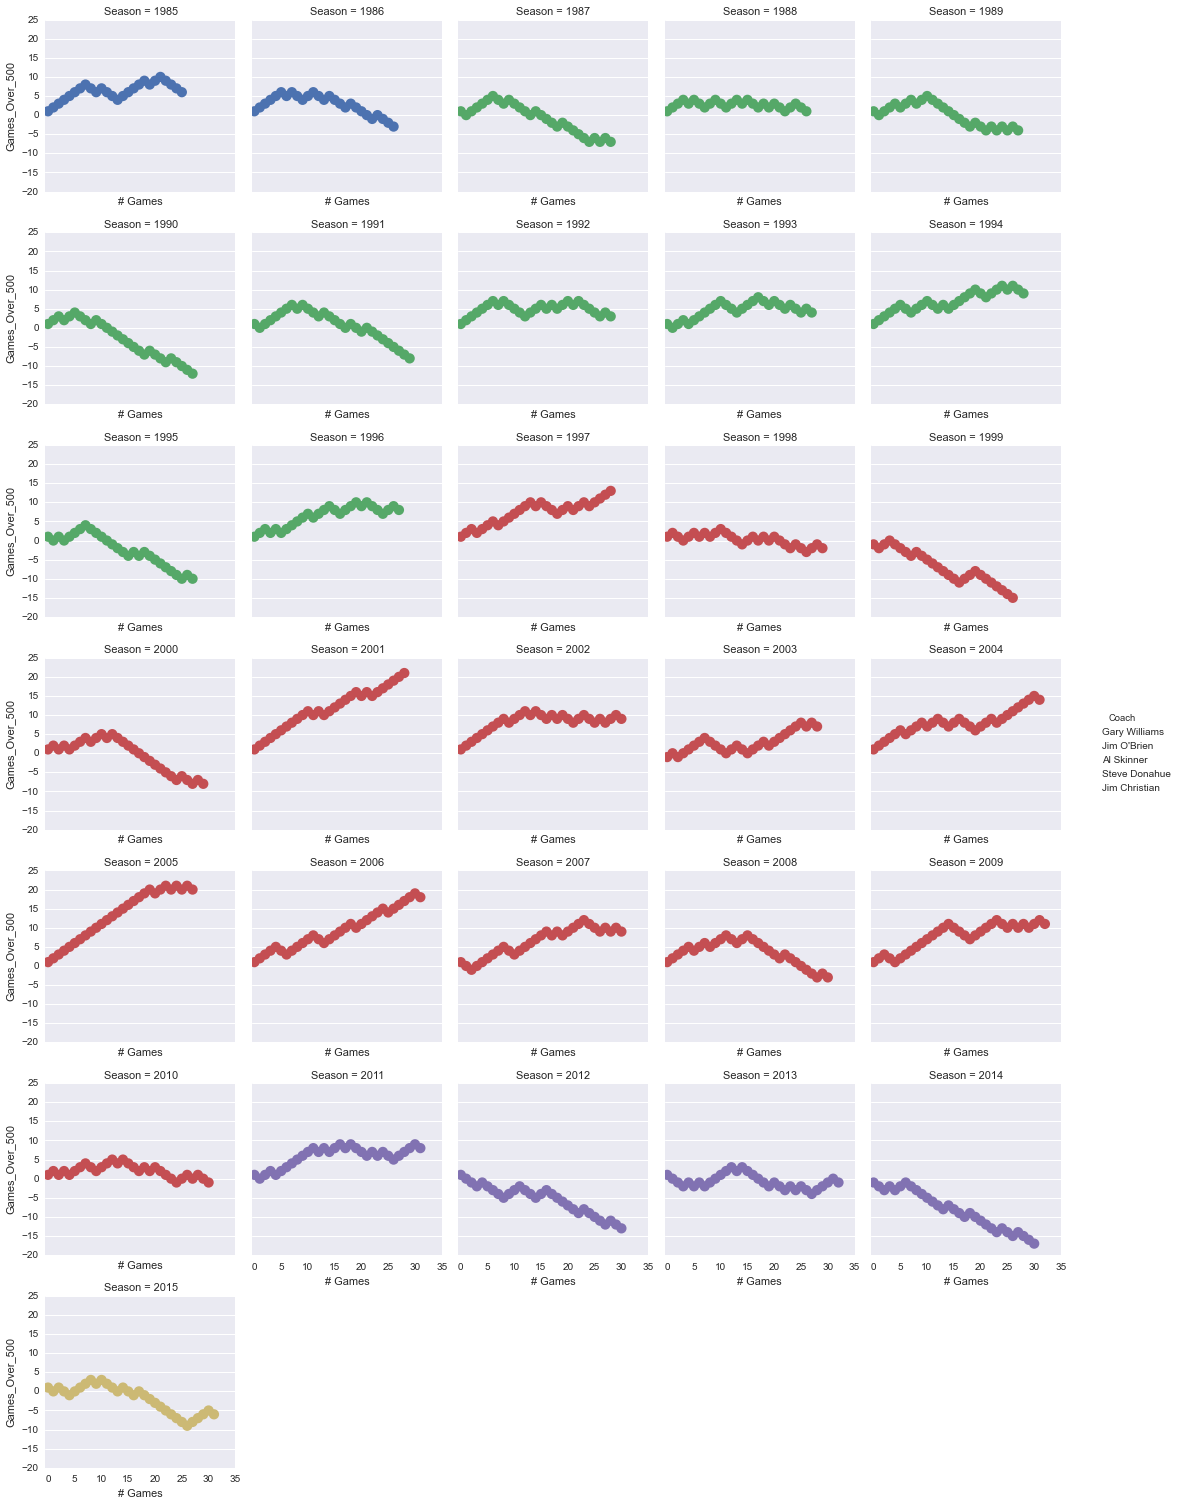

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Plot Record by Season - Legend doesn't want to Work for some Reason
a = sns.FacetGrid(bc_games, col='Season', hue='Coach', col_wrap=5, size=3)
a = (a.map(sns.pointplot, 'Daynum', 'Games_Over_500', ci=None).add_legend())
a.set(xticks=np.arange(0, 40, 5), xticklabels=np.arange(0, 40, 5), xlabel='# Games')